In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

from homer.base import BBGTicker
import homer.proc as proc
from adb.adb import read_symbol

from pcond import sample_sigfn,gap_moves_sigfn
from signal_utils import SignalEvaluationManager

C:\Users\quant\Anaconda3\envs\tyche\lib\site-packages\arctic\_util.py:6: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
C:\Users\quant\Anaconda3\envs\tyche\lib\site-packages\arctic\store\_pandas_ndarray_store.py:6: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import DataFrame, Series, Panel
Library created, but couldn't enable sharding: no such command: 'enablesharding'. This is OK if you're not 'admin'
Library created, but couldn't enable sharding: no such command: 'enablesharding'. This is OK if you're not 'admin'
Library created, but couldn't enable sharding: no such command: 'enablesharding'. This is OK if you're not 'admin'


MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)
Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'tickerverse'), 'tickerverse')


In [2]:
start_dt = dt.date(2020, 1, 1)
wsizes = [1, 5, 10]
df_idr = proc.enhance_ohlc(read_symbol('IHN+1M CURNCY', start_dt, dt.date.today()), windows=wsizes)

sig_df_idr = gap_moves_sigfn('IHN+1M CURNCY',{'IHN+1M CURNCY': df_idr},0.75)
sig_df_idr.head()

2020-09-20 00:08:19,353 - PCond - INFO - Testing SigFn: gap_moves_sigfn
INFO:PCond:Testing SigFn: gap_moves_sigfn


open     high      low    close  open_close_pct_chg  high_1D  \
date                                                                          
2020-01-01  13864.0  13878.0  13863.0  13877.0            0.093768  13878.0   
2020-01-02  13874.0  13929.0  13865.0  13910.0            0.259478  13929.0   
2020-01-03  13910.0  14001.0  13898.0  13981.0            0.510424  14001.0   
2020-01-06  13973.0  14014.0  13963.0  13965.0           -0.057253  14014.0   
2020-01-07  13964.0  13968.0  13902.0  13943.0           -0.150387  13968.0   

             low_1D     1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                              ...   
2020-01-01  13863.0  13877.0               NaN               NaN  ...   
2020-01-02  13865.0  13910.0          0.237804              33.0  ...   
2020-01-03  13898.0  13981.0          0.510424              71.0  ...   
2020-01-06  13963.0  13965.0         -0.114441             -16.0  ...   
2020-01-07  13902.0  13943.0         -0.157537             -22.0  ...   

            close_px_zscore_10d  close_pct_zscore_10d  close_net_zscore_10d  \
date                                                                          
2020-01-01                  NaN                   NaN                   NaN   
2020-01-02                  NaN                   NaN                   NaN   
2020-01-03                  NaN                   NaN                   NaN   
2020-01-06                  NaN                   NaN                   NaN   
2020-01-07                  NaN                   NaN                   NaN   

            close_sharpe_10d  close_omega_10d  close_sortino_10d  \
date                                                               
2020-01-01               NaN              NaN                NaN   
2020-01-02               NaN              NaN                NaN   
2020-01-03               NaN              NaN                NaN   
2020-01-06               NaN              NaN                NaN   
2020-01-07               NaN              NaN                NaN   

            close_num_up_10d  close_num_down_10d  UpDownRatio_10d  sig  
date                                                                    
2020-01-01               NaN                 NaN              NaN    0  
2020-01-02               NaN                 NaN              NaN    0  
2020-01-03               NaN                 NaN              NaN    0  
2020-01-06               NaN                 NaN              NaN    0  
2020-01-07               NaN                 NaN              NaN    0  

[5 rows x 65 columns]

In [3]:
sim = SignalEvaluationManager(sig_df_idr, holding_periods=[1,3,5])
df_idr = sim.holding_period_results(hp=5)

pnl Results:
count      27.000000
mean      159.111111
std       552.733649
min      -859.000000
25%      -120.000000
50%        25.000000
75%       403.500000
max      1754.000000
Name: pnl, dtype: float64


win Results:
count    27.000000
mean      0.037037
std       1.018350
min      -1.000000
25%      -1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: win, dtype: float64


max_gain_loss_ratio Results:
count    27.000000
mean      1.817778
std       1.785494
min       0.030000
25%       0.235000
50%       1.760000
75%       2.645000
max       7.320000
Name: max_gain_loss_ratio, dtype: float64




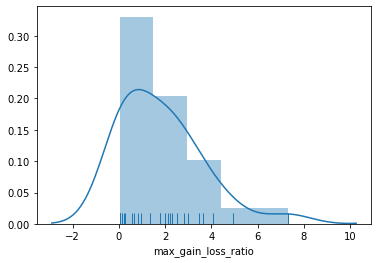

In [4]:
sns.distplot(df_idr['max_gain_loss_ratio'], rug=True);

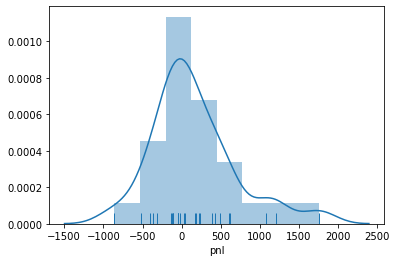

In [5]:
sns.distplot(df_idr['pnl'], rug=True);

In [15]:
start_dt = dt.date(2015, 1, 1)
wsizes = [1, 5, 10]

df_ndf = proc.enhance_ohlc(read_symbol('PPN+1M CURNCY', start_dt, dt.date.today()), windows=wsizes)

df_atm_vol = proc.enhance_ohlc(read_symbol('USDPHPV1M CURNCY', start_dt, dt.date.today()), windows=wsizes)
df_25d_rr = proc.enhance_ohlc(read_symbol('USDPHP25R1M CURNCY', start_dt, dt.date.today()), windows=wsizes)

sig_df = sample_sigfn('PPN+1M CURNCY',{'PPN+1M CURNCY': df_ndf,
                                       'USDPHPV1M CURNCY': df_atm_vol,
                                       'USDPHP25R1M CURNCY': df_25d_rr})


sig_df.head()

2020-09-20 00:09:44,078 - PCond - INFO - Testing SigFn: sample_sigfn
INFO:PCond:Testing SigFn: sample_sigfn
2020-09-20 00:09:44,079 - babel.tickers - INFO - {'IS_NDF': True}
INFO:babel.tickers:{'IS_NDF': True}
2020-09-20 00:09:44,081 - babel.tickers - INFO - {'TICKER': 'PPN+1M CURNCY'}
INFO:babel.tickers:{'TICKER': 'PPN+1M CURNCY'}
2020-09-20 00:09:44,103 - homer.math_utils - INFO - Starting Dates:
 [datetime.date(2015, 1, 1),
 datetime.date(2015, 1, 1),
 datetime.date(2015, 1, 1)]
INFO:homer.math_utils:Starting Dates:
 [datetime.date(2015, 1, 1),
 datetime.date(2015, 1, 1),
 datetime.date(2015, 1, 1)]
2020-09-20 00:09:44,104 - homer.math_utils - INFO - Ending Dates:
 [datetime.date(2020, 8, 21),
 datetime.date(2020, 8, 21),
 datetime.date(2020, 8, 21)]
INFO:homer.math_utils:Ending Dates:
 [datetime.date(2020, 8, 21),
 datetime.date(2020, 8, 21),
 datetime.date(2020, 8, 21)]
2020-09-20 00:09:44,107 - homer.math_utils - WARNING - Dataframes are missing common dates:
{'PPN+1M CURNCY': [d

open   high    low  close  open_close_pct_chg  high_1D  low_1D  \
date                                                                          
2015-01-01  44.87  44.87  44.78  44.82           -0.111433    44.87   44.78   
2015-01-02  44.87  44.96  44.78  44.94            0.156006    44.96   44.78   
2015-01-05  44.93  45.23  44.78  45.15            0.489651    45.23   44.78   
2015-01-06  45.16  45.19  45.01  45.05           -0.243578    45.19   45.01   
2015-01-07  45.09  45.23  45.04  45.11            0.044356    45.23   45.04   

             1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                   ...   
2015-01-01  44.82          0.267738              0.12  ...   
2015-01-02  44.94          0.267738              0.12  ...   
2015-01-05  45.15          0.467290              0.21  ...   
2015-01-06  45.05         -0.221484             -0.10  ...   
2015-01-07  45.11          0.133185              0.06  ...   

            close_px_zscore_10d  close_pct_zscore_10d  close_net_zscore_10d  \
date                                                                          
2015-01-01            -1.995352               0.05533               0.05659   
2015-01-02            -1.995352               0.05533               0.05659   
2015-01-05            -1.995352               0.05533               0.05659   
2015-01-06            -1.995352               0.05533               0.05659   
2015-01-07            -1.995352               0.05533               0.05659   

            close_sharpe_10d  close_omega_10d  close_sortino_10d  \
date                                                               
2015-01-01         -1.379429              0.0          -2.541271   
2015-01-02         -1.379429              0.0          -2.541271   
2015-01-05         -1.379429              0.0          -2.541271   
2015-01-06         -1.379429              0.0          -2.541271   
2015-01-07         -1.379429              0.0          -2.541271   

            close_num_up_10d  close_num_down_10d  UpDownRatio_10d  sig  
date                                                                    
2015-01-01               0.0                 0.1              0.0    0  
2015-01-02               0.0                 0.1              0.0    0  
2015-01-05               0.0                 0.1              0.0    0  
2015-01-06               0.0                 0.1              0.0    0  
2015-01-07               0.0                 0.1              0.0    0  

[5 rows x 65 columns]

In [16]:
sim = SignalEvaluationManager(sig_df, holding_periods=[1,3,5])
df_idr_rr = sim.holding_period_results(hp=1)

pnl Results:
count    2.000000
mean    -0.090000
std      0.296985
min     -0.300000
25%     -0.195000
50%     -0.090000
75%      0.015000
max      0.120000
Name: pnl, dtype: float64


win Results:
count    2.000000
mean     0.000000
std      1.414214
min     -1.000000
25%     -0.500000
50%      0.000000
75%      0.500000
max      1.000000
Name: win, dtype: float64


max_gain_loss_ratio Results:
count    2.00000
mean     0.86000
std      0.59397
min      0.44000
25%      0.65000
50%      0.86000
75%      1.07000
max      1.28000
Name: max_gain_loss_ratio, dtype: float64




C:\Users\quant\PycharmProjects\tyche\tyche\signal_utils.py:61: RuntimeWarning: divide by zero encountered in double_scalars
  self.avg_pnl_day: float = self.pnl / self.days_held


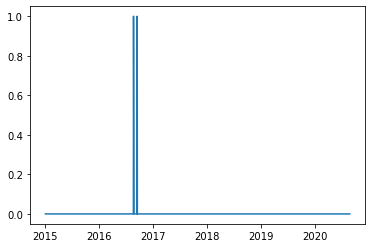

In [17]:
sns.lineplot(data = sig_df['sig']);

In [18]:
sig_df

open   high    low  close  open_close_pct_chg  high_1D  low_1D  \
date                                                                          
2015-01-01  44.87  44.87  44.78  44.82           -0.111433    44.87   44.78   
2015-01-02  44.87  44.96  44.78  44.94            0.156006    44.96   44.78   
2015-01-05  44.93  45.23  44.78  45.15            0.489651    45.23   44.78   
2015-01-06  45.16  45.19  45.01  45.05           -0.243578    45.19   45.01   
2015-01-07  45.09  45.23  45.04  45.11            0.044356    45.23   45.04   
...           ...    ...    ...    ...                 ...      ...     ...   
2020-08-17  48.81  48.85  48.67  48.71           -0.204876    48.85   48.67   
2020-08-18  48.69  48.72  48.57  48.63           -0.123229    48.72   48.57   
2020-08-19  48.63  48.72  48.59  48.70            0.143944    48.72   48.59   
2020-08-20  48.65  48.79  48.63  48.72            0.143885    48.79   48.63   
2020-08-21  48.72  48.83  48.65  48.72            0.000000    48.83   48.65   

             1DMA  close_pct_chg_1d  close_net_chg_1d  ...  \
date                                                   ...   
2015-01-01  44.82          0.267738              0.12  ...   
2015-01-02  44.94          0.267738              0.12  ...   
2015-01-05  45.15          0.467290              0.21  ...   
2015-01-06  45.05         -0.221484             -0.10  ...   
2015-01-07  45.11          0.133185              0.06  ...   
...           ...               ...               ...  ...   
2020-08-17  48.71         -0.163968             -0.08  ...   
2020-08-18  48.63         -0.164237             -0.08  ...   
2020-08-19  48.70          0.143944              0.07  ...   
2020-08-20  48.72          0.041068              0.02  ...   
2020-08-21  48.72          0.000000              0.00  ...   

            close_px_zscore_10d  close_pct_zscore_10d  close_net_zscore_10d  \
date                                                                          
2015-01-01            -1.995352              0.055330              0.056590   
2015-01-02            -1.995352              0.055330              0.056590   
2015-01-05            -1.995352              0.055330              0.056590   
2015-01-06            -1.995352              0.055330              0.056590   
2015-01-07            -1.995352              0.055330              0.056590   
...                         ...                   ...                   ...   
2020-08-17            -3.056179             -0.702038             -0.694990   
2020-08-18            -2.534865             -0.568195             -0.559581   
2020-08-19            -1.465397              2.323357              2.314363   
2020-08-20            -1.085720              1.016747              1.016904   
2020-08-21            -0.890215              0.644218              0.645664   

            close_sharpe_10d  close_omega_10d  close_sortino_10d  \
date                                                               
2015-01-01         -1.379429              0.0          -2.541271   
2015-01-02         -1.379429              0.0          -2.541271   
2015-01-05         -1.379429              0.0          -2.541271   
2015-01-06         -1.379429              0.0          -2.541271   
2015-01-07         -1.379429              0.0          -2.541271   
...                      ...              ...                ...   
2020-08-17         -0.635265              0.0          -2.091420   
2020-08-18         -0.688038              0.0          -1.969708   
2020-08-19         -0.727761              0.0          -2.014327   
2020-08-20         -0.737303              0.0          -2.011815   
2020-08-21         -0.756662              0.0          -2.031143   

            close_num_up_10d  close_num_down_10d  UpDownRatio_10d  sig  
date                                                                    
2015-01-01               0.0                 0.1              0.0    0  
2015-01-02               0.0                 0

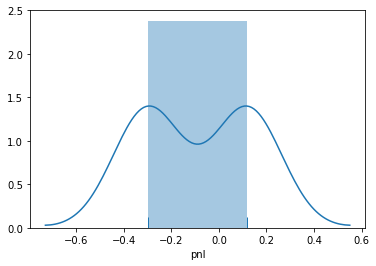

In [19]:
sns.distplot(df_idr_rr['pnl'], rug=True);